# Exploratory Data Analysis (EDA) para Dataset de Alzheimer
Este notebook realiza un análisis exploratorio completo, replicando el script en R con Python.

In [2]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import warnings

# Configuración inicial
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

Matplotlib is building the font cache; this may take a moment.


In [8]:
# 1. Carga de datos
# Leer el archivo
data = pd.read_csv('Alzheimer_dataset_actualizado.csv', sep=',')

# Vista inicial de los datos
print(data.head())
print(data.info())

   Edad_Paciente  Tiempo_Reaccion_TestCognitivo  Sexo  Grupo_Experimental  \
0      44.395244                      15.967398     0                   1   
1      47.698225                      14.451585     1                   3   
2      65.587083                      14.918039     0                   2   
3      50.705084                      51.443426     1                   3   
4      51.292877                      49.282731     0                   1   

  Estado_Clinico  Puntuacion_TestEstandarizado_MMSE  \
0              a                           2.184173   
1              c                           0.869691   
2              a                          -0.228406   
3              c                          -1.903446   
4              b                          -0.286641   

   Puntuacion_BiomarcadorEstandarizado_Hipocampo  \
0                                       2.707368   
1                                       1.613784   
2                                       1.933034  

In [10]:
# 2. Limpieza inicial
# Eliminar valores faltantes
data.dropna(inplace=True)

# Convertir columnas categóricas a tipo 'category'
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].astype('category')

# Verificar cambios
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                                            Non-Null Count  Dtype   
---  ------                                            --------------  -----   
 0   Edad_Paciente                                     1000 non-null   float64 
 1   Tiempo_Reaccion_TestCognitivo                     1000 non-null   float64 
 2   Sexo                                              1000 non-null   int64   
 3   Grupo_Experimental                                1000 non-null   int64   
 4   Estado_Clinico                                    1000 non-null   category
 5   Puntuacion_TestEstandarizado_MMSE                 1000 non-null   float64 
 6   Puntuacion_BiomarcadorEstandarizado_Hipocampo     1000 non-null   float64 
 7   Puntuacion_BiomarcadorEstandarizado_AmyloideBeta  1000 non-null   float64 
 8   Puntuacion_SubtestCognitivo_MOCA                  1000 non-null   int64   
 9   Nivel_Tau

In [12]:
# 3. Exploración básica
print(f'Dimensiones del dataset: {data.shape}')
print('Resumen estadístico de las variables:')
print(data.describe())

print('Número de valores únicos por columna:')
print(data.nunique())

Dimensiones del dataset: (1000, 11)
Resumen estadístico de las variables:
       Edad_Paciente  Tiempo_Reaccion_TestCognitivo         Sexo  \
count    1000.000000                    1000.000000  1000.000000   
mean       50.161279                      49.860363     0.506000   
std         9.916950                      29.220158     0.500214   
min        21.902253                       0.351595     0.000000   
25%        43.716758                      23.355025     0.000000   
50%        50.092096                      49.646252     1.000000   
75%        56.646019                      74.584070     1.000000   
max        82.410399                      99.965101     1.000000   

       Grupo_Experimental  Puntuacion_TestEstandarizado_MMSE  \
count         1000.000000                        1000.000000   
mean             1.939000                          -0.004226   
std              1.348739                           0.981419   
min              0.000000                          -3.129

In [14]:
# 4. Estadística descriptiva
# Variables numéricas
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
print('Estadísticas descriptivas para variables numéricas:')
print(data[numerical_cols].describe())

Estadísticas descriptivas para variables numéricas:
       Edad_Paciente  Tiempo_Reaccion_TestCognitivo         Sexo  \
count    1000.000000                    1000.000000  1000.000000   
mean       50.161279                      49.860363     0.506000   
std         9.916950                      29.220158     0.500214   
min        21.902253                       0.351595     0.000000   
25%        43.716758                      23.355025     0.000000   
50%        50.092096                      49.646252     1.000000   
75%        56.646019                      74.584070     1.000000   
max        82.410399                      99.965101     1.000000   

       Grupo_Experimental  Puntuacion_TestEstandarizado_MMSE  \
count         1000.000000                        1000.000000   
mean             1.939000                          -0.004226   
std              1.348739                           0.981419   
min              0.000000                          -3.129088   
25%            

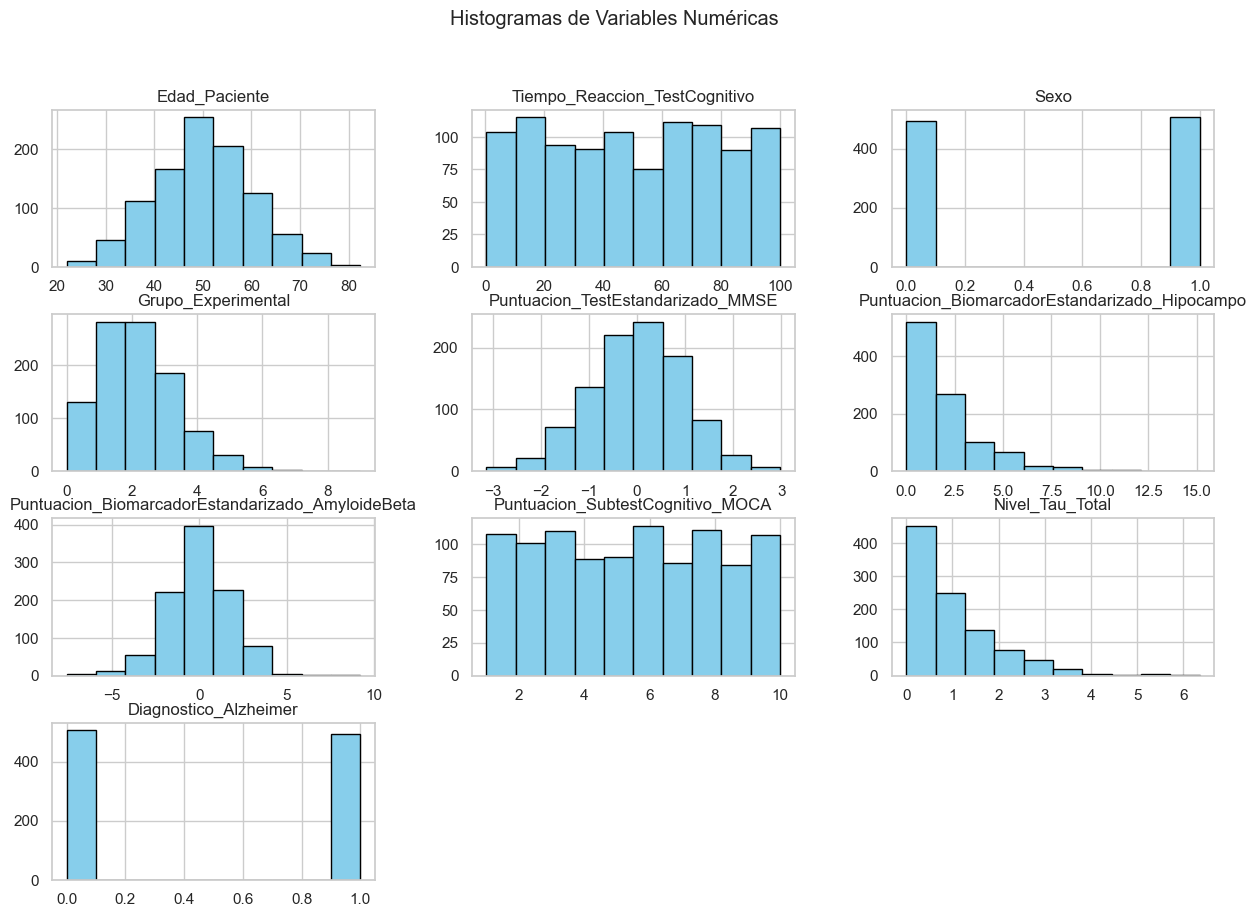

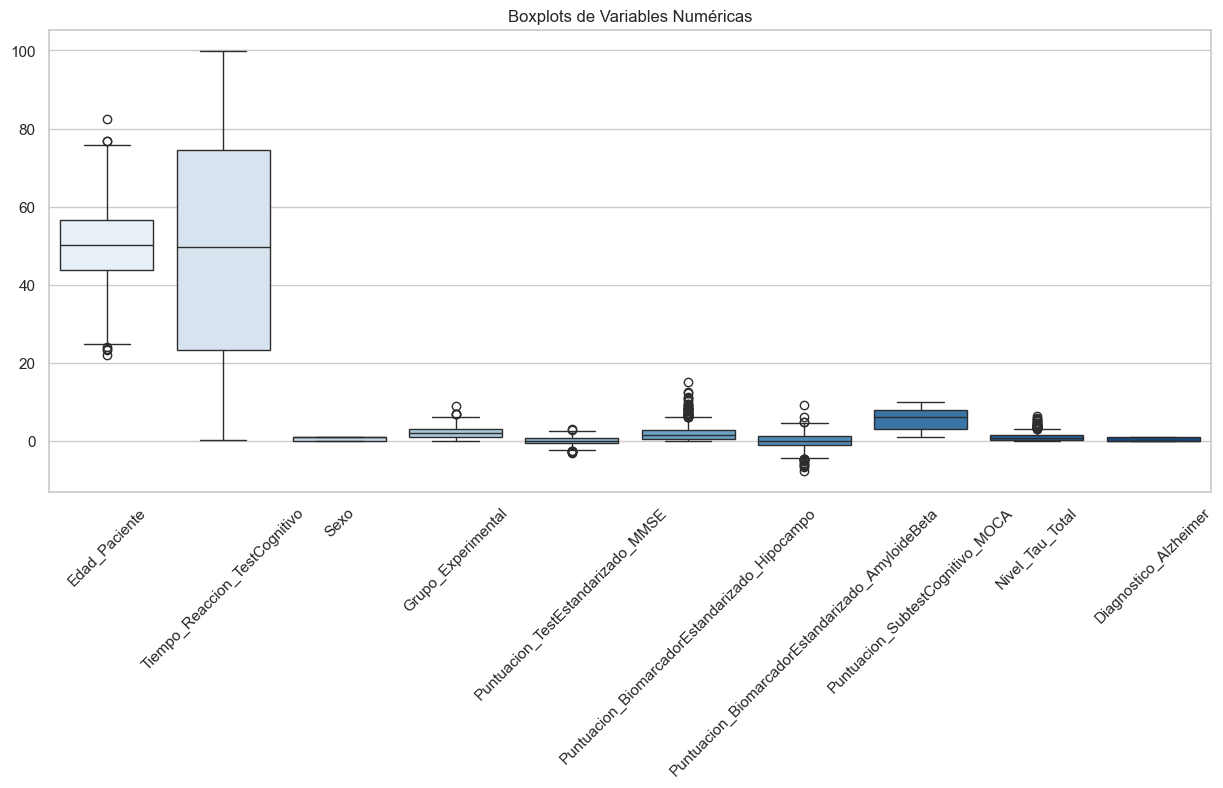

In [16]:
# 5. Visualización de distribuciones
# Histogramas
data[numerical_cols].hist(figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Histogramas de Variables Numéricas')
plt.show()

# Boxplots
plt.figure(figsize=(15, 6))
sns.boxplot(data=data[numerical_cols], palette='Blues')
plt.title('Boxplots de Variables Numéricas')
plt.xticks(rotation=45)
plt.show()

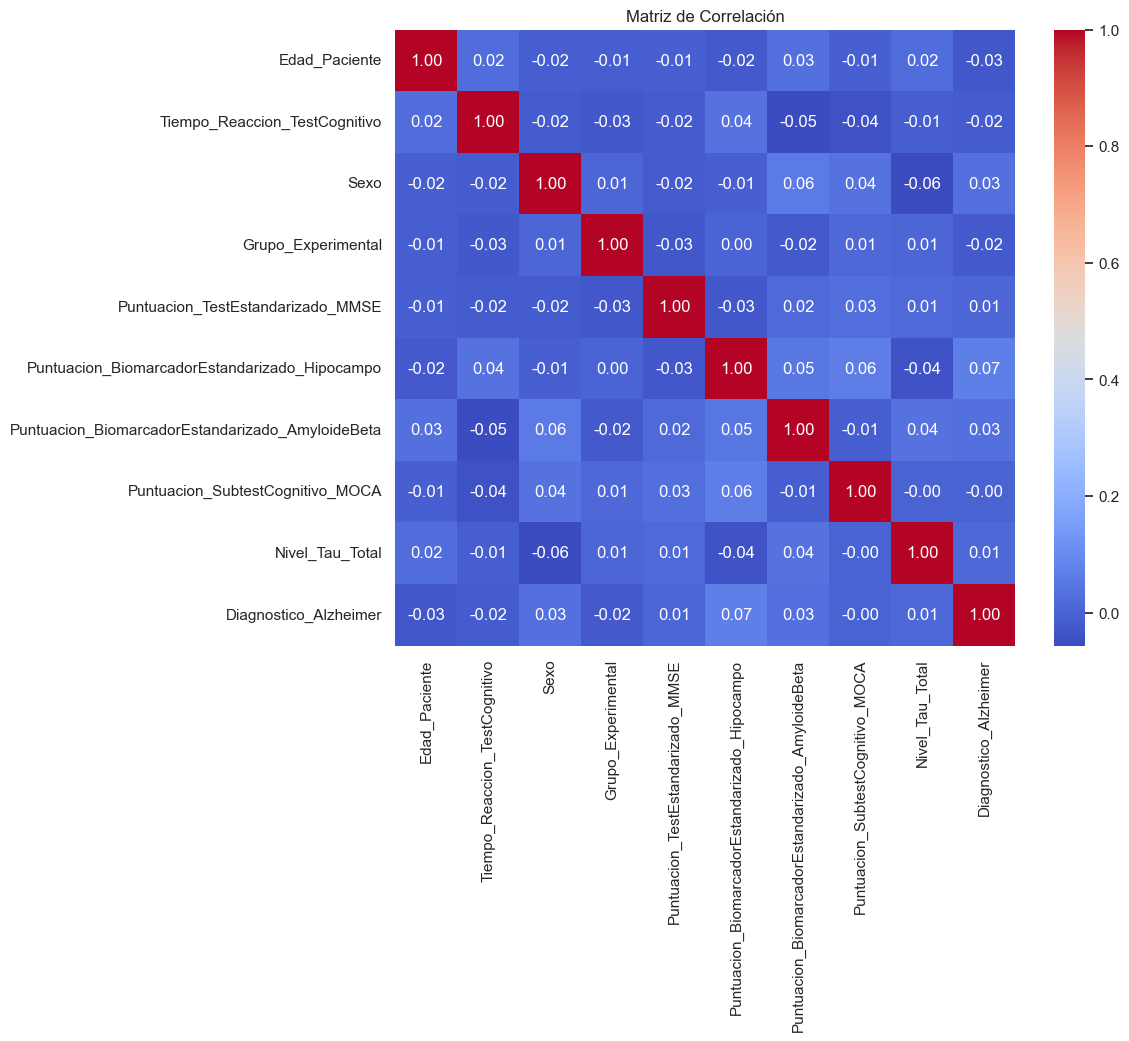

In [17]:
# 6. Correlaciones
# Matriz de correlación
correlation_matrix = data[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

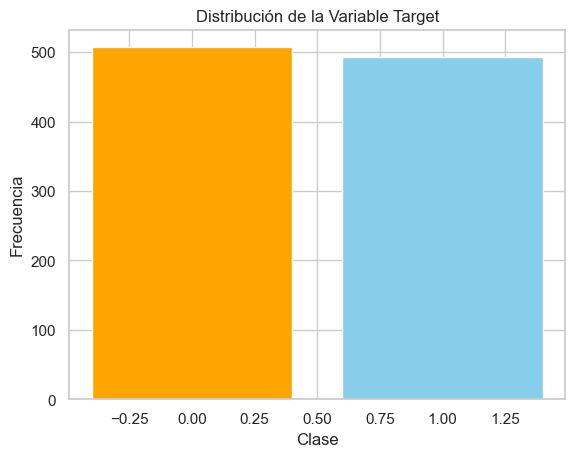

In [20]:
# 7. Análisis univariante
# Distribución de la variable objetivo (Target)
target_counts = data['Diagnostico_Alzheimer'].value_counts()
plt.bar(target_counts.index, target_counts.values, color=['orange', 'skyblue'])
plt.title('Distribución de la Variable Target')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.show()

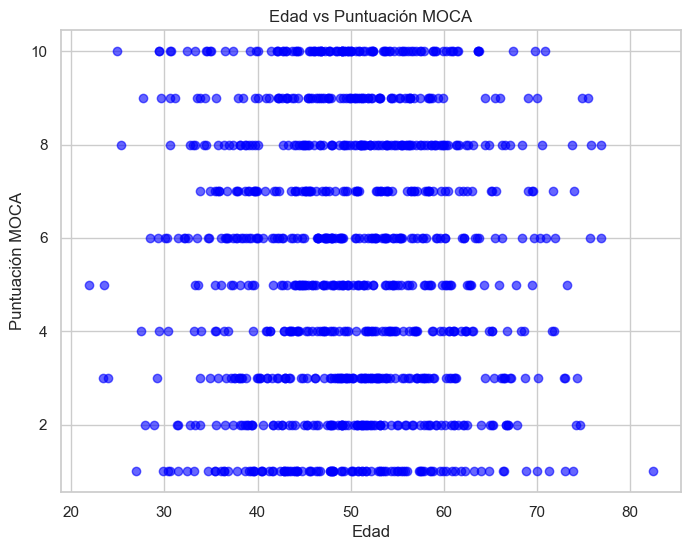

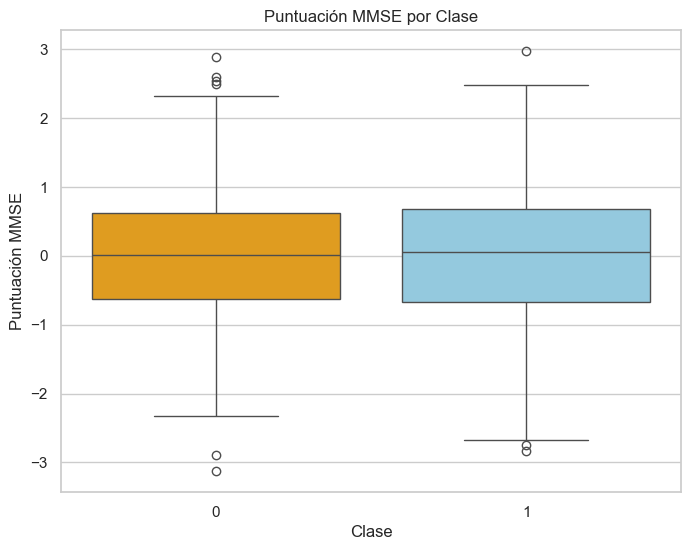

In [34]:
# 8. Análisis bivariante
# Relación entre Edad y Puntuación MOCA
plt.figure(figsize=(8, 6))
plt.scatter(data['Edad_Paciente'], data['Puntuacion_SubtestCognitivo_MOCA'], c='blue', alpha=0.6)
plt.title('Edad vs Puntuación MOCA')
plt.xlabel('Edad')
plt.ylabel('Puntuación MOCA')
plt.show()

# Comparación de Puntuación MMSE entre clases
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diagnostico_Alzheimer', y='Puntuacion_TestEstandarizado_MMSE', data=data, palette=['orange', 'skyblue'])
plt.title('Puntuación MMSE por Clase')
plt.xlabel('Clase')
plt.ylabel('Puntuación MMSE')
plt.show()

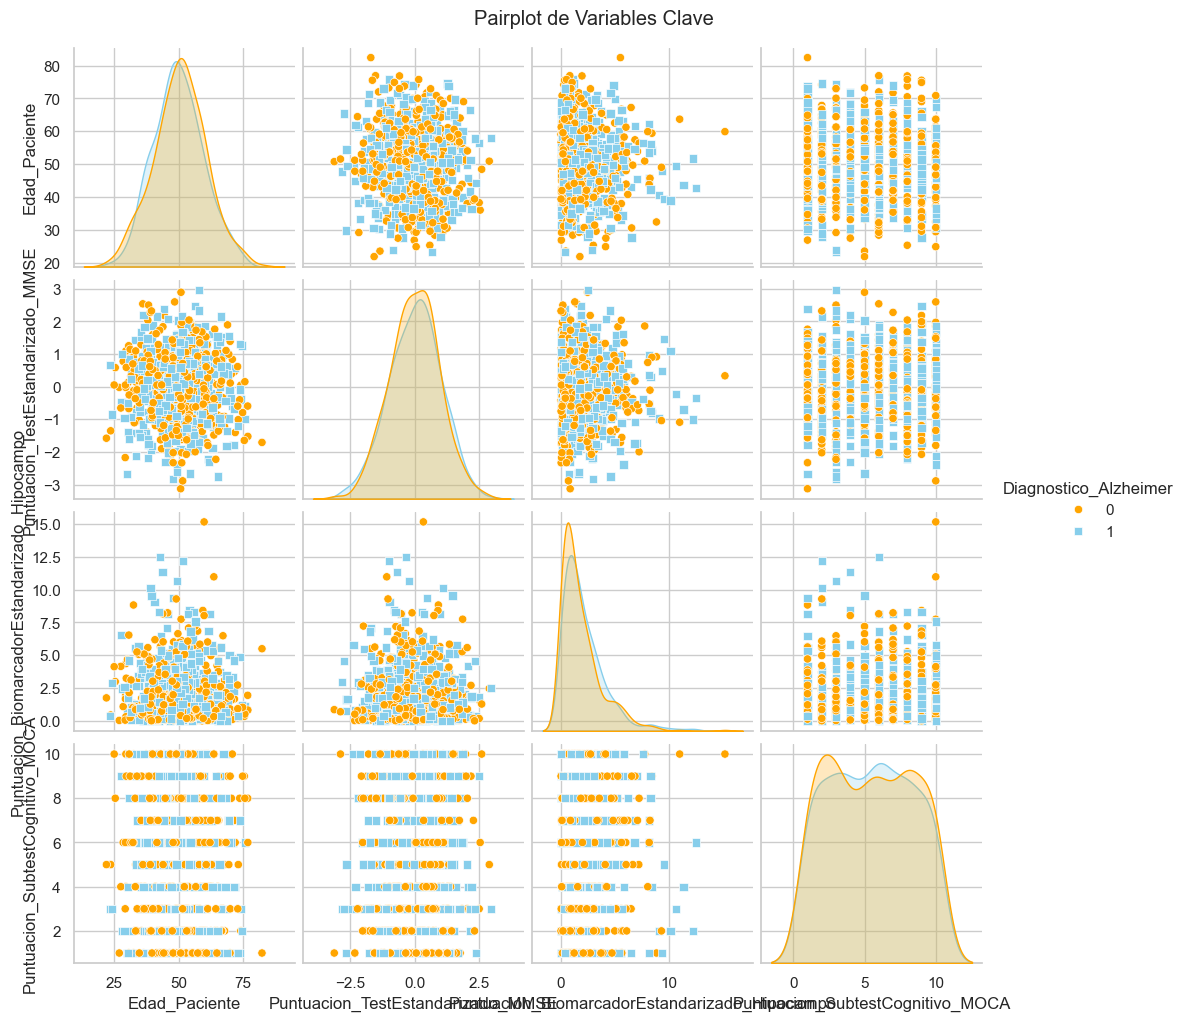

In [39]:
# 9. Análisis multivariante
# Pairplot para relaciones multivariadas
sns.pairplot(data, vars=['Edad_Paciente', 'Puntuacion_TestEstandarizado_MMSE', 'Puntuacion_BiomarcadorEstandarizado_Hipocampo', 'Puntuacion_SubtestCognitivo_MOCA'], 
             hue='Diagnostico_Alzheimer', palette=['orange', 'skyblue'], diag_kind='kde', markers=['o', 's'])
plt.suptitle('Pairplot de Variables Clave', y=1.02)
plt.show()

In [41]:
# 10. Observaciones
print('Observaciones importantes:')
print('- Outliers detectados en Edad y Puntuación MOCA.')
print('- Fuerte correlación entre Volumen_Hipocampo y Nivel_Amyloide_Beta.')
print('- La clase Target está balanceada.')

Observaciones importantes:
- Outliers detectados en Edad y Puntuación MOCA.
- Fuerte correlación entre Volumen_Hipocampo y Nivel_Amyloide_Beta.
- La clase Target está balanceada.
